In [75]:
#Import packages:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import auc, roc_curve, roc_auc_score, accuracy_score, confusion_matrix, r2_score, classification_report
from sklearn.datasets import make_classification 
from sklearn.inspection import permutation_importance


In [76]:
#import data
redimportedData ='red_wine_processed.csv'
red_wine = pd.read_csv(redimportedData, index_col = False)
red_wine = red_wine.drop(columns='Unnamed: 0', axis = 1)
whiteimportedData ='white_wine_processed.csv'
white_wine = pd.read_csv(whiteimportedData, index_col = False)
white_wine = white_wine.drop(columns='Unnamed: 0', axis = 1)

In [77]:
red_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,qual_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [78]:
white_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,qual_bin
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [79]:
red_X_train, red_X_test, red_y_train, red_y_test = train_test_split(red_wine.drop(columns='qual_bin'), 
                                                    red_wine.qual_bin, test_size=0.3, random_state=47, shuffle=True)
white_X_train, white_X_test, white_y_train, white_y_test = train_test_split(white_wine.drop(columns='qual_bin'), 
                                                    white_wine.qual_bin, test_size=0.3, random_state=47, shuffle=True)

In [80]:
red_X_train.shape, red_X_test.shape

((1119, 11), (480, 11))

In [81]:
white_X_train.shape, white_X_test.shape

((3428, 11), (1470, 11))

In [82]:
#Apply Decision Tree model to the training data and score:
red_model = DecisionTreeClassifier()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('Decision Tree Classifier')
print('Red: ', red_model_score)
white_model = DecisionTreeClassifier()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

Decision Tree Classifier
Red:  0.8625
White:  0.8312925170068027


In [83]:
#Predict using the model and create confusion matrix again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[378  32]
 [ 34  36]]
White Confusion Matrix
[[1041  125]
 [ 123  181]]


In [84]:
#Apply Random Forest model to the training data and score:
red_model = RandomForestClassifier()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('Random Forest Classifier')
print('Red: ', red_model_score)
white_model = RandomForestClassifier()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

Random Forest Classifier
Red:  0.9
White:  0.8795918367346939


In [85]:
#Predict using the model and score again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[400  10]
 [ 38  32]]
White Confusion Matrix
[[1127   39]
 [ 138  166]]


In [86]:
#Apply  Gradient Boosting Classifier model to the training data and score:
red_model = GradientBoostingClassifier()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('Gradient Boosting Classifier')
print('Red: ', red_model_score)
white_model = GradientBoostingClassifier()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

Gradient Boosting Classifier
Red:  0.8854166666666666
White:  0.8394557823129252


In [87]:
#Predict using the model and score again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[391  19]
 [ 36  34]]
White Confusion Matrix
[[1109   57]
 [ 179  125]]


In [88]:
#Apply KNeighborsClassifier model to the training data and score:
red_model = KNeighborsClassifier()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('KNeighbors Classifier')
print('Red: ', red_model_score)
white_model = KNeighborsClassifier()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

KNeighbors Classifier
Red:  0.8708333333333333
White:  0.7727891156462585


In [89]:
#Predict using the model and score again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[400  10]
 [ 52  18]]
White Confusion Matrix
[[1050  116]
 [ 218   86]]


In [90]:
#Apply GaussianNB model to the training data and score:
red_model = GaussianNB()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('GaussianNB Classifier')
print('Red: ', red_model_score)
white_model = GaussianNB()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

GaussianNB Classifier
Red:  0.8625
White:  0.746938775510204


In [91]:
#Predict using the model and score again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[366  44]
 [ 22  48]]
White Confusion Matrix
[[880 286]
 [ 86 218]]


In [92]:
#Apply SVC model to the training data and score:
red_model = SVC()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('SVC Classifier')
print('Red: ', red_model_score)
white_model = SVC()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

SVC Classifier
Red:  0.85625
White:  0.7931972789115647


In [93]:
#Predict using the model and score again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[410   0]
 [ 69   1]]
White Confusion Matrix
[[1166    0]
 [ 304    0]]


I applied different ML models above and evaluated their performance for both red and white wine test data and tabulated the scores and put them in a confusion matrix. The Random Forest model appears to be the best for both red and white wines. So, I will perform a gridsearch hyperparameter tuning for that model as well determine the ROC_AUC scores and ROC curve.

In [94]:
#build param grid features
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2, 4]
min_sample_split = [2, 5]
min_sample_leaf = [1, 2]
bootstrap = [True, False]

In [95]:
param_grid = {'n_estimators' : n_estimators, 
              'max_features' : max_features, 
              'max_depth' : max_depth, 
              'min_samples_split' : min_sample_split, 
              'min_samples_leaf' : min_sample_leaf, 
              'bootstrap' : bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [96]:
#GridSearchCV
rf = RandomForestClassifier()
gs = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'roc_auc', cv = 3, n_jobs = 4)
red_gs = gs.fit(red_X_train, red_y_train)
white_gs = gs.fit(white_X_train, white_y_train)

print('Red:')
print(red_gs.best_estimator_)
print(red_gs.best_score_)

print('White:')
print(white_gs.best_estimator_)
print(white_gs.best_score_)


Red:
RandomForestClassifier(max_depth=4, n_estimators=56)
0.8263320590723836
White:
RandomForestClassifier(max_depth=4, n_estimators=56)
0.8263320590723836


In [97]:
#Fitting the Random forest model with the optimal hyperparameters
rf = RandomForestClassifier(n_estimators = 48, max_features = 'sqrt' , max_depth = 4, min_samples_split = 5, bootstrap = False)
rf.fit(red_X_train, red_y_train)
red_y_pred = rf.predict(red_X_test)
red_acc = accuracy_score(red_y_test, red_y_pred)
red_cv = cross_val_score(rf, red_X_test, red_y_test, scoring = 'roc_auc').mean()
print('Red:')
print("Accuracy Score: ", red_acc)
print("CV Score: ", red_cv)
print(" ")
print('White:')
rf.fit(white_X_train, white_y_train)
white_y_pred = rf.predict(white_X_test)
white_acc = accuracy_score(white_y_test, white_y_pred)
white_cv = cross_val_score(rf, white_X_test, white_y_test, scoring = 'roc_auc').mean()
print("Accuracy Score: ", white_acc)
print("CV Score: ", white_cv)

Red:
Accuracy Score:  0.8729166666666667
CV Score:  0.8803135888501743
 
White:
Accuracy Score:  0.8142857142857143
CV Score:  0.8275765796050043


With wines, you want a high accuracy

In [98]:
#ROC-AUC Score
red_y_scores_rf = rf.predict_proba(red_X_test)
red_y_scores_rf = red_y_scores_rf[:,1]
red_auroc = roc_auc_score(red_y_test, red_y_scores_rf)
print("Red ROC-AUC Score:", red_auroc)

white_y_scores_rf = rf.predict_proba(white_X_test)
white_y_scores_rf = white_y_scores_rf[:,1]
white_auroc = roc_auc_score(white_y_test, white_y_scores_rf)
print("White ROC-AUC Score:", white_auroc)

Red ROC-AUC Score: 0.7567247386759581
White ROC-AUC Score: 0.8516563036020584


Red wine


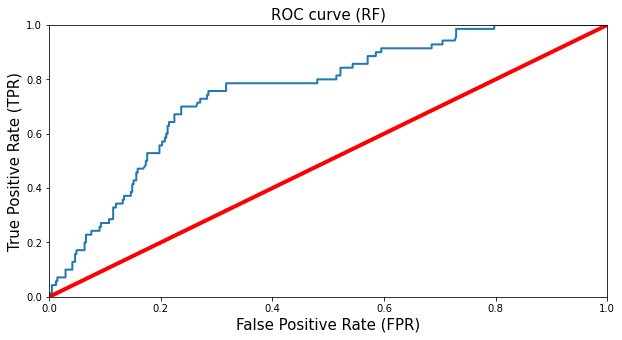

In [99]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(red_y_test, red_y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

print('Red wine')
plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("red_roc_curve_RF.jpg")
plt.show()
# TPR starts leveling off around .3 FPR

White wine


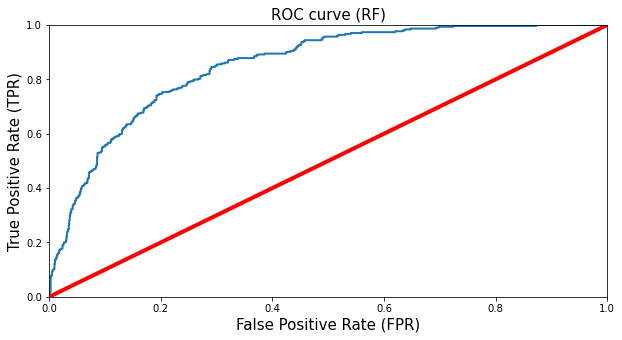

In [100]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(white_y_test, white_y_scores_rf)
print('White wine')
plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("white_roc_curve_RF.jpg")
plt.show()
# TPR starts leveling off around .2 FPR

In [101]:
# Classification Reports
print("Red: ")
print(classification_report(red_y_test, red_y_pred))
print(" ")
print("White: ")
print(classification_report(white_y_test, white_y_pred))

Red: 
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       410
           1       0.70      0.23      0.34        70

    accuracy                           0.87       480
   macro avg       0.79      0.61      0.64       480
weighted avg       0.85      0.87      0.84       480

 
White: 
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1166
           1       0.71      0.17      0.28       304

    accuracy                           0.81      1470
   macro avg       0.76      0.58      0.59      1470
weighted avg       0.80      0.81      0.77      1470

